In [648]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [597]:
dfTrain = pd.read_csv(r"C:\Users\ABRAHAM\Downloads\train-data.csv")
dfTest = pd.read_csv(r"C:\Users\ABRAHAM\Downloads\test-data.csv")

In [598]:
dfTrain.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [599]:
dfTest.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN
1233,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN


In [600]:
dfTrain.drop(["Unnamed: 0", "New_Price"],inplace = True, axis =1)
dfTest.drop(["Unnamed: 0", "New_Price"],inplace = True, axis =1)

In [601]:
dfTrain.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [602]:
dfTrain['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64

In [603]:
dfTrain['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [604]:
dfTrain['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [605]:
dfTrain['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [606]:
dfTrain['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [607]:
dfTrain.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [608]:
# ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
#        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
#        'Price']

Name = LabelEncoder()
dfTrain['Name'] = Name.fit_transform(dfTrain['Name'])
dfTest['Name'] = Name.fit_transform(dfTest['Name'])

Location = LabelEncoder()
dfTrain['Location'] = Name.fit_transform(dfTrain['Location'])
dfTest['Location'] = Name.fit_transform(dfTest['Location'])

Fuel_Type = LabelEncoder()
dfTrain['Fuel_Type'] = Name.fit_transform(dfTrain['Fuel_Type'])
dfTest['Fuel_Type'] = Name.fit_transform(dfTest['Fuel_Type'])

Transmission = LabelEncoder()
dfTrain['Transmission'] = Name.fit_transform(dfTrain['Transmission'])
dfTest['Transmission'] = Name.fit_transform(dfTest['Transmission'])

Owner_Type = LabelEncoder()
dfTrain['Owner_Type'] = Name.fit_transform(dfTrain['Owner_Type'])
dfTest['Owner_Type'] = Name.fit_transform(dfTest['Owner_Type'])

In [609]:
dfTest

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,414,4,2014,40929,0,1,0,32.26 km/kg,998 CC,58.2 bhp,4.0
1,409,3,2013,54493,3,1,2,24.7 kmpl,796 CC,47.3 bhp,5.0
2,724,9,2017,34000,1,1,0,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,690,5,2012,139000,1,1,0,23.59 kmpl,1364 CC,null bhp,5.0
4,334,9,2014,29000,3,1,0,18.5 kmpl,1197 CC,82.85 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,759,5,2011,89411,1,1,0,20.54 kmpl,1598 CC,103.6 bhp,5.0
1230,746,9,2015,59000,3,0,0,17.21 kmpl,1197 CC,103.6 bhp,5.0
1231,583,8,2012,28000,1,1,0,23.08 kmpl,1461 CC,63.1 bhp,5.0
1232,746,10,2013,52262,3,0,3,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [610]:
dfTrain.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [611]:
# Replace kmpl and 'Km/kg' from Mileage from Train data
dfTrain['Mileage'] = dfTrain['Mileage'].str.replace('kmpl', '')
dfTrain['Mileage'] = dfTrain['Mileage'].str.replace('km/kg', '')

# Replace kmpl and 'Km/kg' from Mileage from Test data
dfTest['Mileage'] = dfTest['Mileage'].str.replace('kmpl', '')
dfTest['Mileage'] = dfTest['Mileage'].str.replace('km/kg', '')

# Replace CC and bhp from Train data
dfTrain['Engine'] = dfTrain['Engine'].str.replace('CC', '')
dfTrain['Power'] = dfTrain['Power'].str.replace('bhp', '')

# Replace CC and bhp from Test data
dfTest['Engine'] = dfTest['Engine'].str.replace('CC', '')
dfTest['Power'] = dfTest['Power'].str.replace('bhp', '')

In [612]:
dfTrain['Power'] = dfTrain['Power'].str.strip()
dfTrain['Power'] = dfTrain['Power'].str.replace('null', '0')

In [613]:
dfTest['Power'] = dfTest['Power'].str.strip()
dfTest['Power'] = dfTest['Power'].str.replace('null', '0')

In [614]:
dfTest.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [615]:
dfTrain.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [616]:
dfTest.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [617]:
#dfTrain.Power.fillna(dfTrain.Power.mean(),skipna = True, axis =1, inplace =True)
dfTrain.Power = dfTrain.Power.fillna('0')
dfTrain.Engine = dfTrain.Engine.fillna('0')
dfTrain.Mileage = dfTrain.Mileage.fillna('0')

dfTest.Power = dfTest.Power.fillna('0')
dfTest.Engine = dfTest.Engine.fillna('0')
dfTest.Mileage = dfTest.Mileage.fillna('0')

In [618]:
# Convert Mileage , Engine and Power values to float
dfTrain['Mileage'] = dfTrain['Mileage'].astype("float")
dfTrain['Engine'] = dfTrain['Engine'].astype("float")
dfTrain['Power'] = dfTrain['Power'].astype("float")

dfTest['Mileage'] = dfTest['Mileage'].astype("float")
dfTest['Engine'] = dfTest['Engine'].astype("float")
dfTest['Power'] = dfTest['Power'].astype("float")

In [619]:
# Set seats count as int and null value as -1
dfTrain.Seats = dfTrain.Seats.fillna('-1') 
dfTrain['Seats'] = dfTrain['Seats'].astype("int")

dfTest.Seats = dfTest.Seats.fillna('-1') 
dfTest['Seats'] = dfTest['Seats'].astype("int")

In [620]:
dfTest.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                  int32
dtype: object

In [621]:
dfTest.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [622]:
#X_Train = dfTrain[['']
dfTrain.corr()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Name,1.000000,0.025413,0.013001,0.026767,-0.068720,0.138385,-0.027776,-0.019545,0.025573,-0.139337,0.150925,-0.099886
Location,0.025413,1.000000,-0.020117,-0.042751,0.115048,0.040174,-0.033889,0.018778,-0.080476,-0.066024,-0.038578,-0.116620
Year,0.013001,-0.020117,1.000000,-0.173048,-0.129526,-0.097059,-0.386160,0.320643,-0.030592,0.084728,0.067052,0.305327
Kilometers_Driven,0.026767,-0.042751,-0.173048,1.000000,-0.102953,0.025663,0.079924,-0.064915,0.087549,0.022738,0.064865,-0.011493
Fuel_Type,-0.068720,0.115048,-0.129526,-0.102953,1.000000,0.125219,0.043017,-0.151414,-0.402779,-0.267483,-0.277952,-0.305207
Transmission,0.138385,0.040174,-0.097059,0.025663,0.125219,1.000000,0.003002,0.334307,-0.490800,-0.626233,0.055920,-0.586025
Owner_Type,-0.027776,-0.033889,-0.386160,0.079924,0.043017,0.003002,1.000000,-0.153180,0.039254,-0.000619,-0.024846,-0.094559
Mileage,-0.019545,0.018778,0.320643,-0.064915,-0.151414,0.334307,-0.153180,1.000000,-0.549938,-0.419891,-0.190525,-0.306191
Engine,0.025573,-0.080476,-0.030592,0.087549,-0.402779,-0.490800,0.039254,-0.549938,1.000000,0.844788,0.426706,0.647232
Power,-0.139337,-0.066024,0.084728,0.022738,-0.267483,-0.626233,-0.000619,-0.419891,0.844788,1.000000,0.176292,0.751724


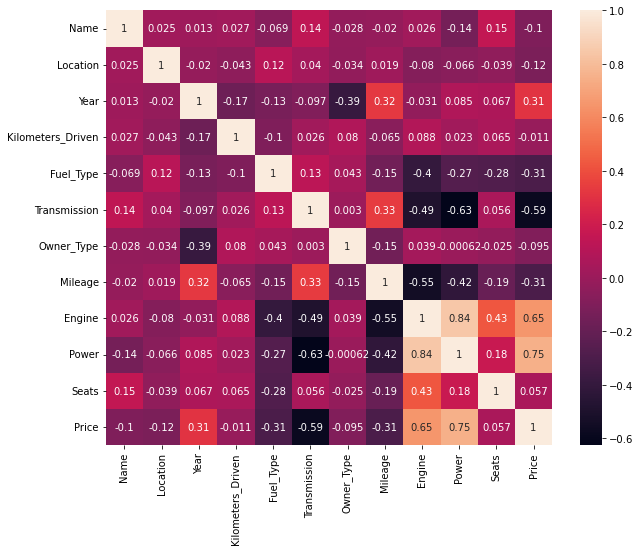

In [623]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfTrain.corr(),annot=True)
plt.show()

In [663]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(dfTest.corr(),annot=True)
# plt.show()

In [625]:
dfTrain.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [626]:

#Y_Test = dfTest['Price']

In [627]:
dfTrain.Mileage = dfTrain.Mileage.replace(0.0,np.nan)
dfTrain.Engine = dfTrain.Engine.replace(0.0,np.nan)
dfTrain.Power = dfTrain.Power.replace(0.0,np.nan)
dfTrain.Seats = dfTrain.Power.replace(-1,np.nan)

dfTest.Mileage = dfTest.Mileage.replace(0.0,np.nan)
dfTest.Engine = dfTest.Engine.replace(0.0,np.nan)
dfTest.Power = dfTest.Power.replace(0.0,np.nan)
dfTest.Seats = dfTest.Power.replace(-1,np.nan)
#Engine	Power

In [647]:
#dfTrain[dfTrain.Engine ==0.0]
print(dfTrain.isnull().sum())
dfTest.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [629]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean',)
dfTrain[['Mileage']] = impute.fit_transform(dfTrain[['Mileage']])
dfTrain[['Engine']] =impute.fit_transform(dfTrain[['Engine']])
dfTrain[['Power']] = impute.fit_transform(dfTrain[['Power']])

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfTrain[['Seats']] = impute.fit_transform(dfTrain[['Seats']])

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
dfTest[['Mileage']] =impute.fit_transform(dfTest[['Mileage']])
dfTest[['Engine']] =impute.fit_transform(dfTest[['Engine']])
dfTest[['Power']] =impute.fit_transform(dfTest[['Power']])

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfTest[['Seats']] = impute.fit_transform(dfTest[['Seats']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

In [630]:
dfTrain.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [661]:
X_Train = dfTrain[['Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']]
Y_Train = dfTrain['Price']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Price'>

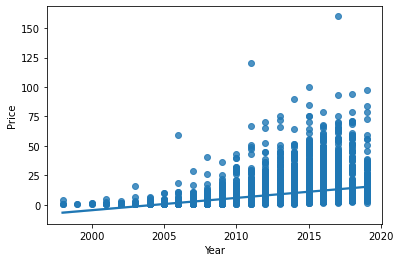

In [669]:
sns.regplot(dfTrain.Year, dfTrain.Price )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine', ylabel='Price'>

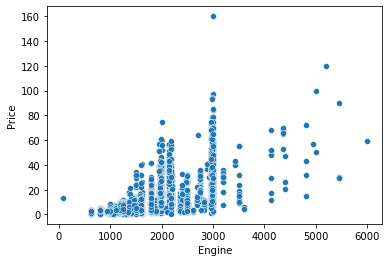

In [666]:
#,'Engine', 'Power','Seats'
sns.scatterplot(dfTrain['Engine'],dfTrain['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Power', ylabel='Price'>

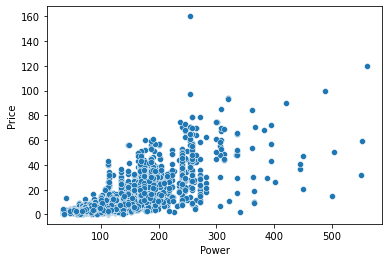

In [667]:
sns.scatterplot(dfTrain['Power'],dfTrain['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats', ylabel='Price'>

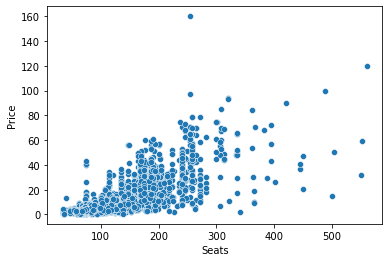

In [668]:
sns.scatterplot(dfTrain['Seats'],dfTrain['Price'])

In [632]:
X_Test =dfTest[['Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats']]

In [680]:
#Linear Regression 
modelLR = LinearRegression()
modelLR.fit(X_Train,Y_Train)
Y_PredLR = modelLR.predict(X_Test)

<AxesSubplot:xlabel='Engine'>

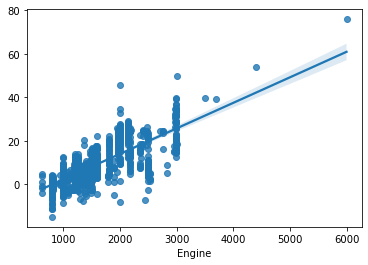

In [689]:
sns.regplot(x=X_Test.Engine, y=Y_PredLR, label='Prediction')

<AxesSubplot:xlabel='Year'>

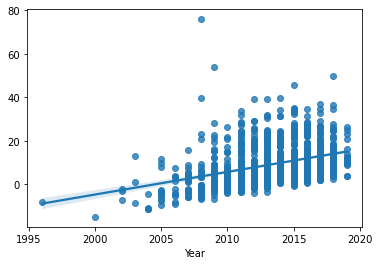

In [681]:
sns.regplot(x=X_Test.Year, y=Y_PredLR, label='Prediction')

<AxesSubplot:xlabel='Power'>

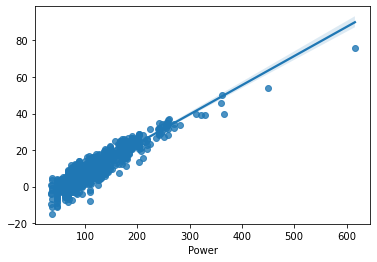

In [688]:
sns.regplot(x=X_Test.Power, y=Y_PredLR, label='Prediction')

In [682]:
#Decision Tree Regressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_Train,Y_Train)
Y_PredDTR = modelDTR.predict(X_Test)

<AxesSubplot:xlabel='Engine'>

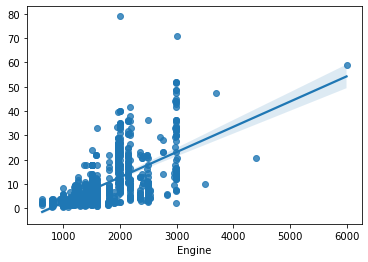

In [690]:
sns.regplot(x=X_Test.Engine, y=Y_PredDTR, label='Prediction')

<AxesSubplot:xlabel='Power'>

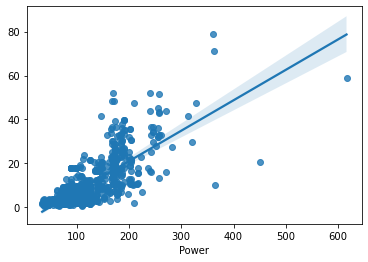

In [691]:
sns.regplot(x=X_Test.Power, y=Y_PredDTR, label='Prediction')

<AxesSubplot:xlabel='Year'>

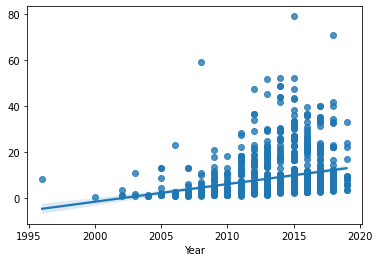

In [692]:
sns.regplot(x=X_Test.Year, y=Y_PredDTR, label='Prediction')

In [684]:
#Random Forest Regressor
ModelRFR = RandomForestRegressor()
ModelRFR.fit(X_Train,Y_Train)
PredRFR = ModelRFR.predict(X_Test)

<AxesSubplot:xlabel='Power'>

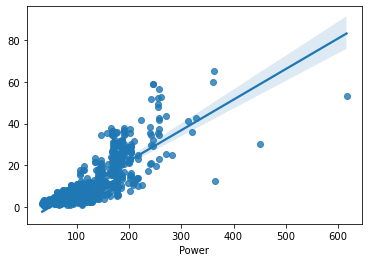

In [693]:
sns.regplot(x=X_Test.Power, y=PredRFR, label='Prediction')

<AxesSubplot:xlabel='Engine'>

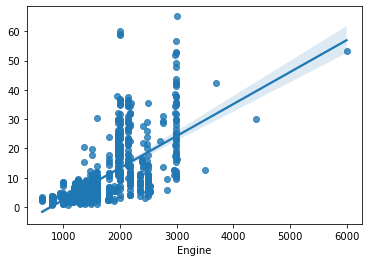

In [694]:
sns.regplot(x=X_Test.Engine, y=PredRFR, label='Prediction')

<AxesSubplot:xlabel='Year'>

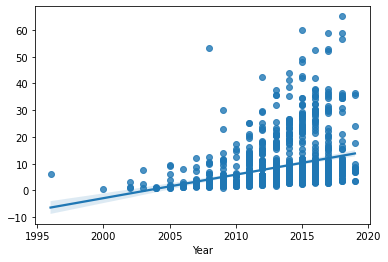

In [695]:
sns.regplot(x=X_Test.Year, y=PredRFR, label='Prediction')

In [686]:
# AdaBoostRegressor
ModelABR = AdaBoostRegressor()
ModelABR.fit(X_Train,Y_Train)
PredABR = ModelABR.predict(X_Test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine'>

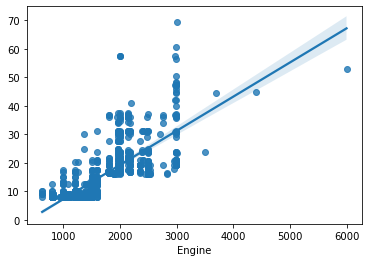

In [696]:
sns.regplot(X_Test.Engine, PredABR )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Power'>

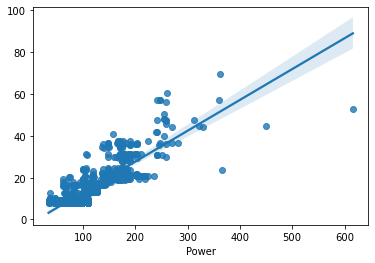

In [697]:
sns.regplot(X_Test.Power, PredABR )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

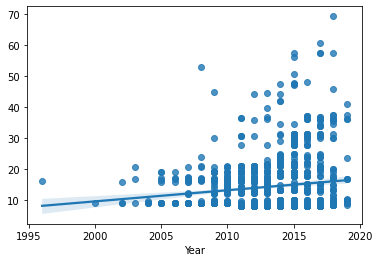

In [698]:
sns.regplot(X_Test.Year, PredABR )